# Import libraries

In [17]:
import time
import warnings

from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from constants import *

from sklearn import datasets
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans,AffinityPropagation

import warnings
from constants import *
import math
import seaborn as sns
import random
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import dill

# Helper Functions

# Datasets

In [18]:
RNASeq_path = 'RPKMOutput/RNASeq.txt' 
RPF_path = 'RPKMOutput/RPF.txt'
RNASeq = pd.read_csv(RNASeq_path, sep='\t')
RPF = pd.read_csv(RPF_path, sep='\t')


In [19]:
RNASeq = RNASeq[(RNASeq['cdReads0'] >= 10) & (RNASeq['cdReads1'] >= 10) & (RNASeq['cdReads2'] >= 10)& (RNASeq['cdReads3'] >= 10)& (RNASeq['cdReads4'] >= 10)]
RPF = RPF[(RPF['cdReads0'] >= 10) & (RPF['cdReads1'] >= 10) & (RPF['cdReads2'] >= 10)& (RPF['cdReads3'] >= 10)& (RPF['cdReads4'] >= 10)]

In [20]:
RNASeq[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']] = RNASeq[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']].apply(np.log2)

In [21]:
RPF[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']] = RPF[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']].apply(np.log2)

In [22]:
RNASeq['log2cdRPKM1']=RNASeq['cdRPKM1']-RNASeq['cdRPKM0']
RNASeq['log2cdRPKM2']=RNASeq['cdRPKM2']-RNASeq['cdRPKM0']
RNASeq['log2cdRPKM3']=RNASeq['cdRPKM3']-RNASeq['cdRPKM0']
RNASeq['log2cdRPKM4']=RNASeq['cdRPKM4']-RNASeq['cdRPKM0']

In [23]:
RPF['log2cdRPKM1']=RPF['cdRPKM1']-RPF['cdRPKM0']
RPF['log2cdRPKM2']=RPF['cdRPKM2']-RPF['cdRPKM0']
RPF['log2cdRPKM3']=RPF['cdRPKM3']-RPF['cdRPKM0']
RPF['log2cdRPKM4']=RPF['cdRPKM4']-RPF['cdRPKM0']

In [25]:
filteredRNASeq = RNASeq[(RNASeq['log2cdRPKM1'] <= 0.5) 
                        & (RNASeq['log2cdRPKM2'] <= 0.5)
                        & (RNASeq['log2cdRPKM3'] <= 0.5)
                        & (RNASeq['log2cdRPKM4'] <= 0.5)]
filteredRNASeq = filteredRNASeq[(filteredRNASeq['log2cdRPKM1'] >= -0.5) 
                                & (filteredRNASeq['log2cdRPKM2'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM3'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM4'] >= -0.5)]

In [26]:
TE = reduce(lambda left,right: pd.merge(left,right,on=['AccNum','GeneName']), [RPF,filteredRNASeq])

In [27]:
TE['cdRPKM0_x'] = TE['cdRPKM0_x']-TE['cdRPKM0_y']
TE['cdRPKM1_x'] = TE['cdRPKM1_x']-TE['cdRPKM1_y']
TE['cdRPKM2_x'] = TE['cdRPKM2_x']-TE['cdRPKM2_y']
TE['cdRPKM3_x'] = TE['cdRPKM3_x']-TE['cdRPKM3_y']
TE['cdRPKM4_x'] = TE['cdRPKM4_x']-TE['cdRPKM4_y']
for i in range(0,5):
    TE.rename(columns={'cdRPKM'+str(i)+'_x':'TE'+str(i)}, inplace=True)
TE = TE[['AccNum', 'GeneName','TE0','TE1','TE2','TE3','TE4']]

In [28]:
TE['foldTE1']=TE['TE1']-TE['TE0']
TE['foldTE2']=TE['TE2']-TE['TE0']
TE['foldTE3']=TE['TE3']-TE['TE0']
TE['foldTE4']=TE['TE4']-TE['TE0']

In [36]:
TE.to_csv('/Users/akankshitadash/Desktop/TE.txt',sep='\t',index=False)

In [29]:
TE.head()

,AccNum,GeneName,TE0,TE1,TE2,TE3,TE4,foldTE1,foldTE2,foldTE3,foldTE4
0,NM_017847,ODR4,1.311593,1.239842,1.411084,1.623031,1.266305,-0.071751,0.099491,0.311438,-0.045287
1,NM_001003803,ATP5S,1.898159,1.914442,2.395429,2.596103,1.894337,0.016283,0.497270,0.697943,-0.003823
2,NM_016647,THEM6,0.051293,0.207781,0.361159,0.620028,0.068366,0.156488,0.309866,0.568735,0.017073
3,NM_016640,MRPS30,0.556363,0.551786,0.263127,0.284844,0.340352,-0.004577,-0.293236,-0.271519,-0.216011
4,NM_001080825,TMEM120B,0.237953,0.493599,0.790843,0.390857,0.455389,0.255646,0.552890,0.152904,0.217436


In [30]:
X = TE[['foldTE1',
       'foldTE2', 'foldTE3', 'foldTE4']].values

In [38]:
def plot_BIC(list_k, BIC_score,variance):
    fig = plt.subplot(111)
    plt.plot(list_k, BIC_score, marker='o')  
    plt.xlabel('Value of K')
    plt.ylabel('Objective')
    plt.title('BIC for '+ variance)
    plt.savefig('/Users/akankshitadash/Desktop/GMM/BIC')
    plt.show()

In [42]:
X[:5]

array([[-0.07175057,  0.0994913 ,  0.31143801, -0.04528745],
       [ 0.01628275,  0.49726959,  0.6979433 , -0.00382262],
       [ 0.15648765,  0.30986551,  0.56873496,  0.01707261],
       [-0.00457683, -0.29323627, -0.27151893, -0.21601109],
       [ 0.25564588,  0.55289021,  0.15290443,  0.21743615]])

# Determine optimal K for different covariance settings

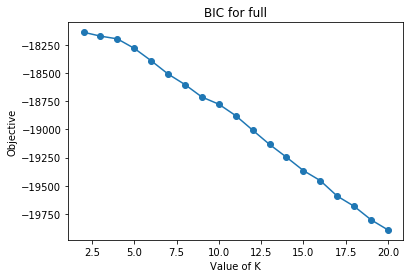

Max BIC occurs at K = 2


In [39]:
list_k = range(2,21)
variances = ['full'] #'spherical','diag','tied',
for var in variances:
    BIC_score = []
    for i in list_k:
        gmm = GMM(n_components=i, covariance_type=var,n_init=15) #,n_init=15
        gmm.fit(X)
        BIC_score.append(-gmm.bic(X))
    plot_BIC(list_k,BIC_score,var)
    print("Max BIC occurs at K =",BIC_score.index(max(BIC_score))+2)

In [23]:
# Check BIC/Log likelihood

In [40]:
TE.keys()

Index(['AccNum', 'GeneName', 'TE0', 'TE1', 'TE2', 'TE3', 'TE4', 'foldTE1',
       'foldTE2', 'foldTE3', 'foldTE4'],
      dtype='object')

# Plot for diag

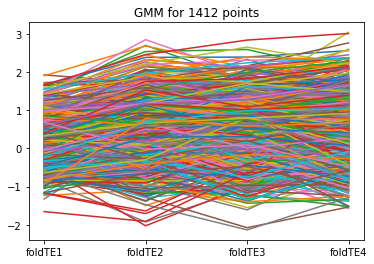

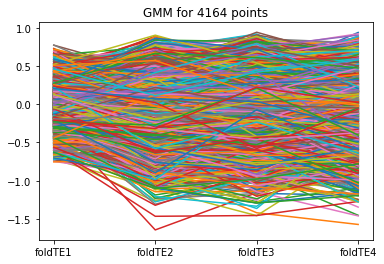

1412


NameError: name 'plot_heatmap' is not defined

In [46]:
gmm = GMM(n_components=2, covariance_type='full',n_init=15)
gmm.fit(X)
K = 2 #insert K here
X_predicted = [ [] for i in range(K)]

for x in X:
    X_predicted[gmm.predict([x])[0]].append(x)
var_plot_list = ['foldTE1','foldTE2', 'foldTE3', 'foldTE4']

for idx,cluster in enumerate(X_predicted):
    fig = plt.subplot(111)
    for points in cluster:
        fig.plot(var_plot_list,points)
    title = "GMM for "+str(len(cluster)) + " points"
    plt.title(title)
    plt.savefig('/Users/akankshitadash/Desktop/GMM/Cluster'+str(idx+1))
    plt.show() 

In [48]:
for idx,cluster in enumerate(X_predicted):
    print(len(cluster))
    genes=[]
    acc_nums=[]
    for row in cluster:
        temp = TE.loc[(TE['foldTE1'] == row[0])& (TE['foldTE2']== row[1]) & (TE['foldTE3']== row[2])]
        if(not temp.empty):
            genes.append(temp['GeneName'].values[0])
            acc_nums.append(temp['AccNum'].values[0])
    print(len(cluster),len(genes))
    with open('/Users/akankshitadash/Desktop/GMM/Gene'+str(idx+1)+'.txt','w') as f:
        for gene in genes:
            f.write("%s\n" % gene)
    with open('/Users/akankshitadash/Desktop/GMM/AccNum'+str(idx+1)+'.txt','w') as f:
        for acc_num in acc_nums:
            f.write("%s\n" % acc_num)

1412
1412 1412
4164
4164 4164


## HMM

In [49]:
import numpy as np
import pandas as pd
from hmmlearn import hmm
import warnings
from constants import *
import math
import os
import random
import matplotlib.pyplot as plt
import dill
from functools import reduce

In [50]:
def generate_random_sample(X, size):
    '''
    Given a list X, 
    generate random samples of given size
    '''
    Z_temp = random.sample(list(X), size)
    
    #Concatenation
    Z = [Z_temp[0]]
    for val in Z_temp[1:]:
        Z = np.concatenate([Z,[val]])
    
    return Z

def convert_values_to_list(list_val):
    '''
    Given a list X = [1 2 3] , 
    return X = [[1],[2],[3]]
    '''
    X = []
    for i in list_val:
        X.append([i])
    return X

def conversion_list_of_list(X, DIMENSION):
    '''
    Given a list X with values in lists,
    X = [[ 3  2  2],[4 8 10]]
    Convert each value to a list
    Return list of lists, array of lengths of each sequence
    X = [[3] [2] [2] [4] [8] [10]]
    ''' 
    X_new = []
    length = len(X)
    for idx, val_list in enumerate(X):
        Y = []
        for val in val_list:
            Y.append([val])
        X_new.append(Y)

    #Concatenation
    Z = X_new[0]
    for val_list in X_new[1:]:
        Z = np.concatenate([Z,val_list])

    # assign array of lengths for HMM
    lengths = [DIMENSION]*length
    
    return Z,lengths

#Calculate likelihood for given sequence according to given HMMs and return HMM
def likelihood_sequence(sequence, HMM_array):
    '''
    Given list of K HMMs and sequence,
    determines likelihood of sequence under all HMM models
    Returns index of HMM which has max likelihood
    ''' 
    scores = []
    length = [len(sequence)]
    for i, HMM in enumerate(HMM_array):
        calculated_score = HMM.score(sequence, length)
        scores.append(calculated_score)
    idx = scores.index(max(scores))
    return idx

def HMM_model_stats(model):
    '''
    Details of HMM model
    ''' 
    print("*************************************")
    print("Transition matrix")
    print(model.transmat_)
    print("*************************************")
    print("Means and stds of each hidden state")
    for i in range(model.n_components):
        print("Hidden state {0}".format(i))
        print("mean = ", model.means_[i])
        print("std = ", [np.sqrt(model.covars_[i])])
        print()

def BIC(model,X,lengths):
    LogLikelihood = model.score(X,lengths)
    num_hidden_states = model.n_components
    # D counts transition matrix (emission estimated by PDF), means = num_hidden_states  
    # covariance matrix = num_hidden_states
    D = num_hidden_states**2-num_hidden_states + 2*num_hidden_states
    BIC = LogLikelihood - (D/2)*np.log(len(X))
    return BIC
    
def BIC_array(HMM_array,X_i):
    BIC_total = 0
    for i in range(len(X_i)):
        model = HMM_array[i]
        X, lengths = conversion_list_of_list(X_i[i],DIMENSION)
        BIC_total+= BIC(model,X,lengths)
    return BIC_total

def likelihood_array(HMM_array,X_i):
    likelihood_total = 0
    for i in range(len(X_i)):
        if(len(X_i[i])>=HMM_array[i].n_components):
            model = HMM_array[i]
            X, lengths = conversion_list_of_list(X_i[i],DIMENSION)
            LogLikelihood = model.score(X,lengths)
            likelihood = LogLikelihood 
            likelihood_total+= likelihood
    return likelihood_total

def plot_BIC(list_k, BIC_score):
    fig = plt.subplot(111)
    plt.plot(list_k, BIC_score, marker='o')  
    plt.xlabel('Value of K')
    plt.ylabel('Objective')
    plt.title('BIC')
    plt.show() 

def print_stats(assignments,length):
    for i in range(length):
        if(i%100==0):
            print(assignments[i])   

In [51]:
HMM_K_ARRAYS = []
X_i_K_ARRAYS = []

In [52]:
K_values = [4]

In [62]:
print(K_values)

[4, 5]


In [55]:
print(X[:5])

[[-0.07175057  0.0994913   0.31143801 -0.04528745]
 [ 0.01628275  0.49726959  0.6979433  -0.00382262]
 [ 0.15648765  0.30986551  0.56873496  0.01707261]
 [-0.00457683 -0.29323627 -0.27151893 -0.21601109]
 [ 0.25564588  0.55289021  0.15290443  0.21743615]]


In [56]:
LENGTH= len(X)
DIMENSION = 4
for K in K_values:
    HMM_array = []
    X_i = []
    print("**************** K =", K ,"************************")
    for i in range(K):
        X_i.append([])
        
    NUM_ITERATIONS = 0
    NUM_CLUSTER_PREV = {}
    NUM_CLUSTER_NOW = {}
    
    # Sequences for initial HMM estimation
    # Make K subsets data of LENGTH
    for i in range(LENGTH):
        for j in range(K):
            if(i%K==j):
                X_i[j].append(list(X[i]))
                NUM_CLUSTER_PREV[i] = j
                
    for i in range(K):
        model = hmm.GaussianHMM(n_components=3,covariance_type='diag')
        X_temp, lengths = conversion_list_of_list(X_i[i],DIMENSION)
        model.fit(X_temp, lengths)
        HMM_array.append(model)
    
    likelihood_prev = likelihood_array(HMM_array,X_i)
    print("Likelihood for iteration",NUM_ITERATIONS,"is",likelihood_prev)
    NUM_ITERATIONS+=1
    while (True):
        # Assign all sequences to HMM models

        print("************ Check likelihood of sequence in HMM  *********")
        NUM_CLUSTER_NOW = {}
        for idx,x in enumerate(X):
            sequence = convert_values_to_list(x)
            hmm_index = likelihood_sequence(sequence, HMM_array)
            X_i[hmm_index].append(list(x))
            NUM_CLUSTER_NOW[idx] = hmm_index
        print("************ Checking likelihood done  *********")

        # Re-estimate parameters for new HMMs
        print("************ Re-estimating HMM *********")
        HMM_array_prev = HMM_array
        HMM_array = []
        for i in range(K):
            model = hmm.GaussianHMM(n_components=3,covariance_type='diag')
            if(len(X_i[i])>=model.n_components):
                X_temp, lengths = conversion_list_of_list(X_i[i], DIMENSION)
                model.fit(X_temp, lengths)
                HMM_array.append(model)
            else:
                HMM_array.append(HMM_array_prev[i])
        print("************ Re-estimation done *********")
        likelihood_curr = likelihood_array(HMM_array,X_i)
        print("Likelihood for iteration",NUM_ITERATIONS,"is",likelihood_curr)
        print("*****************************************")

        # if no reassignments, then break
        if ((NUM_CLUSTER_PREV == NUM_CLUSTER_NOW)):
            HMM_K_ARRAYS.append(HMM_array)
            X_i_K_ARRAYS.append(X_i)
            break
        else:
            # initialize empty subsets of data for next iteration
            X_i = []
            for i in range(K):
                X_i.append([])

            NUM_CLUSTER_PREV = NUM_CLUSTER_NOW
            print("Num iterations is:", NUM_ITERATIONS)
            NUM_ITERATIONS += 1
            likelihood_prev = likelihood_curr
    print("**********************************************************\n\n")

**************** K = 4 ************************
Likelihood for iteration 0 is -11626.0362901
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 1 is -19711.1297463
*****************************************
Num iterations is: 1
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 2 is -5177.26413926
*****************************************
Num iterations is: 2
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 3 is -4158.74966392
*****************************************
Num iterations is: 3
*******

************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 28 is -3515.6329297
*****************************************
Num iterations is: 28
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 29 is -3512.16730393
*****************************************
Num iterations is: 29
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 30 is -3506.66019932
*****************************************
Num iterations is: 30
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
*****

************ Re-estimation done *********
Likelihood for iteration 55 is -3479.89162898
*****************************************
Num iterations is: 55
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 56 is -3477.99293797
*****************************************
Num iterations is: 56
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 57 is -3478.51984038
*****************************************
Num iterations is: 57
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 58 is -3478.61088491
******

************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 83 is -3421.73510337
*****************************************
Num iterations is: 83
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 84 is -3414.86588758
*****************************************
Num iterations is: 84
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 85 is -3409.66046394
*****************************************
Num iterations is: 85
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
****

************ Re-estimation done *********
Likelihood for iteration 110 is -2959.57788566
*****************************************
Num iterations is: 110
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 111 is -2959.25614814
*****************************************
Num iterations is: 111
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 112 is -2958.71880228
*****************************************
Num iterations is: 112
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 113 is -2958.0522939


************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 7 is -2530.83633302
*****************************************
Num iterations is: 7
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 8 is -2486.28792317
*****************************************
Num iterations is: 8
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 9 is -2416.4448413
*****************************************
Num iterations is: 9
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
***********

************ Re-estimation done *********
Likelihood for iteration 34 is -1961.19775073
*****************************************
Num iterations is: 34
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 35 is -1960.42773435
*****************************************
Num iterations is: 35
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 36 is -1960.03571934
*****************************************
Num iterations is: 36
************ Check likelihood of sequence in HMM  *********
************ Checking likelihood done  *********
************ Re-estimating HMM *********
************ Re-estimation done *********
Likelihood for iteration 37 is -1960.19640997
******

In [66]:
X_model = X_i_K_ARRAYS[1]
for idx,x in enumerate(X_model):
    genes=[]
    acc_nums=[]
    for row in x:
        temp = (TE.loc[(TE['foldTE1'] == row[0])& (TE['foldTE2']== row[1]) & (TE['foldTE3']== row[2]) & (TE['foldTE4']== row[3])])
        if(not temp.empty):
            genes.append(temp['GeneName'].values[0])
            acc_nums.append(temp['AccNum'].values[0])
    print(len(x),len(genes))
    with open('/Users/akankshitadash/Desktop/HMM/Gene'+str(idx+1)+'.txt','w') as f:
        for gene in genes:
            f.write("%s\n" % gene)
    with open('/Users/akankshitadash/Desktop/HMM/AccNum'+str(idx+1)+'.txt','w') as f:
        for acc_num in acc_nums:
            f.write("%s\n" % acc_num)

803 803
1028 1028
1394 1394
1215 1215
1136 1136


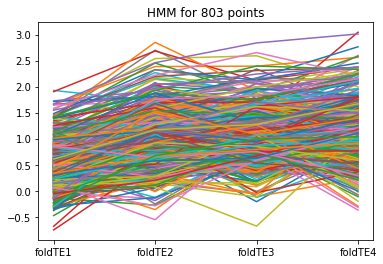

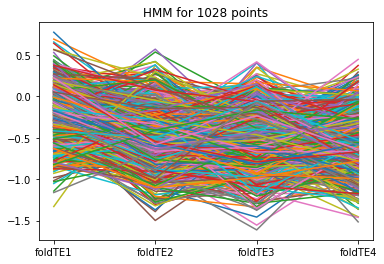

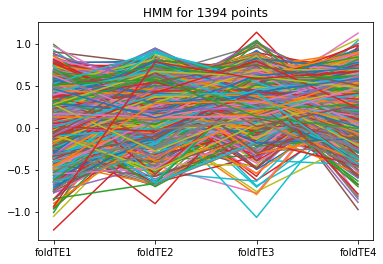

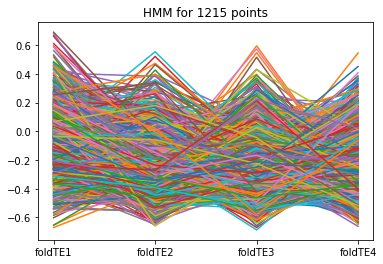

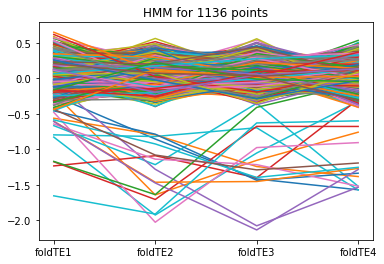

In [68]:
var_plot_list = ['foldTE1','foldTE2', 'foldTE3', 'foldTE4']
for idx,cluster in enumerate(X_i_K_ARRAYS[1]):
    fig = plt.subplot(111)
    for points in cluster:
        fig.plot(var_plot_list,points)
    title = "HMM for "+str(len(cluster)) + " points"
    plt.title(title)
    plt.savefig('/Users/akankshitadash/Desktop/HMM/Cluster'+str(idx+1))
    plt.show() 